In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from matplotlib import style
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv("dataset.csv", header = None,index_col= False,
                 names=["Likes","Checkin","PageTheme","PageCategory","Derived5","Derived6","Derived7","Derived8","Derived9","Derived10",
                       "Derived11","Derived12","Derived13","Derived14","Derived15","Derived16","Derived17","Derived18","Derived19",
                       "Derived20","Derived21","Derived22","Derived23","Derived24","Derived25","Derived26","Derived27","Derived28","Derived29",
                       "CC1","CC2","CC3","CC4","CC5","BaseTime","PostLength","PostShareCount","PostPromoStatus","HLocal","PostPublishSun",
                        "PostPublishedMon","PostPublishedTue","PostPublishedWed","PostPublishedThu","PostPublishedFri","PostPublishedSat",
                       "BaseDateTimeSun","BaseDateTimeMon","BaseDateTimeTue","BaseDateTimeWed","BaseDateTimeThu","BaseDateTimeFri","BaseDateTimeSat"
                       ,"Target"])

In [3]:
# classifying the target variable
np.mean(df.loc[:,'Target'])

7.103668103519464

In [4]:
freq = df['Target'].value_counts()

In [5]:
freq_sorted = freq.sort_index(axis = 0, ascending = True)

In [6]:
freq_sorted

0       66888
1       15451
2        7696
3        4741
4        3317
        ...  
1161        1
1235        1
1378        1
1497        1
1816        1
Name: Target, Length: 510, dtype: int64

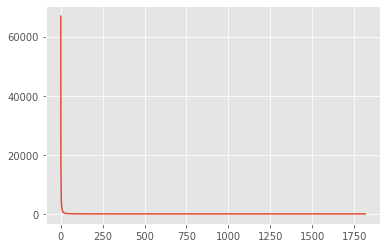

In [7]:
plt.figure()
plt.plot(freq_sorted)
plt.yticks([0,20000,40000,60000])
plt.show()

# as can be seen that most of the values are closer to 0-50 hrs. There is high chance of getting a post comment between that period
# we will classify it as >0 positive class and =0 as negative class

In [8]:
# stored in a new variable
df_class = df.copy(deep=True)

In [9]:
# Classifying anything greater than 0 as class positive and less than as class negative
df_class['TargetClass'] = np.where(df['Target'] > 0 , 1, 0)

In [10]:
# Dropping the original Target variable
df_class.drop(['Target'], axis = 1)

,Likes,Checkin,PageTheme,PageCategory,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,PostPublishedFri,PostPublishedSat,BaseDateTimeSun,BaseDateTimeMon,BaseDateTimeTue,BaseDateTimeWed,BaseDateTimeThu,BaseDateTimeFri,BaseDateTimeSat,TargetClass
0,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,0,0,0,0,0,0,0,0,1,0
1,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,0,0,0,0,0,0,0,0,1,0
2,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,1,0,0,0,0,0,0,0,1,0
3,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,1,0,1,0,0,0,0,0,0,0
4,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121093,7170111,70,497000,9,0.0,2113.0,456.581081,213.5,477.089459,0.0,...,0,0,0,0,0,0,1,0,0,1
121094,7170111,70,497000,9,0.0,2113.0,456.581081,213.5,477.089459,0.0,...,0,0,0,0,0,0,1,0,0,1
121095,7170111,70,497000,9,0.0,2113.0,456.581081,213.5,477.089459,0.0,...,0,0,0,0,0,0,1,0,0,1
121096,7170111,70,497000,9,0.0,2113.0,456.581081,213.5,477.089459,0.0,...,0,0,0,0,0,0,1,0,0,1


In [11]:
list(df_class)

['Likes',
 'Checkin',
 'PageTheme',
 'PageCategory',
 'Derived5',
 'Derived6',
 'Derived7',
 'Derived8',
 'Derived9',
 'Derived10',
 'Derived11',
 'Derived12',
 'Derived13',
 'Derived14',
 'Derived15',
 'Derived16',
 'Derived17',
 'Derived18',
 'Derived19',
 'Derived20',
 'Derived21',
 'Derived22',
 'Derived23',
 'Derived24',
 'Derived25',
 'Derived26',
 'Derived27',
 'Derived28',
 'Derived29',
 'CC1',
 'CC2',
 'CC3',
 'CC4',
 'CC5',
 'BaseTime',
 'PostLength',
 'PostShareCount',
 'PostPromoStatus',
 'HLocal',
 'PostPublishSun',
 'PostPublishedMon',
 'PostPublishedTue',
 'PostPublishedWed',
 'PostPublishedThu',
 'PostPublishedFri',
 'PostPublishedSat',
 'BaseDateTimeSun',
 'BaseDateTimeMon',
 'BaseDateTimeTue',
 'BaseDateTimeWed',
 'BaseDateTimeThu',
 'BaseDateTimeFri',
 'BaseDateTimeSat',
 'Target',
 'TargetClass']

In [12]:
# Splitting the data into X
#X = df_class.loc[:,'Likes':'BaseDateTimeSat']
# Selecting 17 features from previous finding
df = df_class
df.head()

,Likes,Checkin,PageTheme,PageCategory,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,PostPublishedSat,BaseDateTimeSun,BaseDateTimeMon,BaseDateTimeTue,BaseDateTimeWed,BaseDateTimeThu,BaseDateTimeFri,BaseDateTimeSat,Target,TargetClass
0,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,0,0,0,0,0,0,0,1,0,0
1,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,0,0,0,0,0,0,0,1,0,0
2,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,0,0,0,0,0,0,0,1,0,0
3,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,0,1,0,0,0,0,0,0,0,0
4,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,0,0,0,0,1,0,0,0,0,0


In [13]:
# Splitting the data into y
X = df.loc[:,['Likes','Checkin','PageTheme','PageCategory','CC1','CC2','CC3','CC4','CC5','BaseTime','PostLength','PostShareCount','PostPromoStatus',
              'HLocal','PostPublishSun','PostPublishedMon','PostPublishedTue','PostPublishedWed','PostPublishedThu','PostPublishedFri','PostPublishedSat',
              'BaseDateTimeSun','BaseDateTimeMon','BaseDateTimeTue','BaseDateTimeWed','BaseDateTimeThu','BaseDateTimeFri',
              'BaseDateTimeSat']]
y = df.iloc[:,-1]
X.head()

,Likes,Checkin,PageTheme,PageCategory,CC1,CC2,CC3,CC4,CC5,BaseTime,...,PostPublishedThu,PostPublishedFri,PostPublishedSat,BaseDateTimeSun,BaseDateTimeMon,BaseDateTimeTue,BaseDateTimeWed,BaseDateTimeThu,BaseDateTimeFri,BaseDateTimeSat
0,634995,0,463,1,0,0,0,0,0,70,...,0,0,0,0,0,0,0,0,0,1
1,634995,0,463,1,0,0,0,0,0,42,...,1,0,0,0,0,0,0,0,0,1
2,634995,0,463,1,0,0,0,0,0,12,...,0,1,0,0,0,0,0,0,0,1
3,634995,0,463,1,7,1,6,7,-5,42,...,0,1,0,1,0,0,0,0,0,0
4,634995,0,463,1,1,0,1,1,-1,54,...,0,0,0,0,0,0,1,0,0,0


In [14]:
# Splitting data into train and test using sklearn split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.3)

In [15]:
print(X.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(121098, 28)
(84768, 28)
(84768,)
(36330, 28)
(36330,)


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [19]:
import statsmodels.api as sm
X = np.append(arr=np.ones((121098,1)).astype(int), values=X, axis=1)
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j] == maxVar):
                    x = np.delete(x, j, 1)
    return(regressor_OLS.summary())
    return x
 
sl = 0.05
X_Modeled= X[:, [0,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18,20,22,23,24,25,26,27,28]]
X_sig = backwardElimination(X_Modeled, sl)

In [20]:
X_sig_train, X_sig_test, y_train, y_test = train_test_split(X_sig, y, test_size=0.3,random_state=0)
from sklearn.decomposition import PCA
pcaObj = PCA(n_components=None)
X_train = pcaObj.fit_transform(X_sig_train)
X_test = pcaObj.transform(X_sig_test)
components_variance = pcaObj.explained_variance_ratio_

TypeError: Singleton array array(<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TargetClass   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     1096.
Date:                Wed, 27 Nov 2019   Prob (F-statistic):               0.00
Time:                        16:51:44   Log-Likelihood:                -78560.
No. Observations:              121098   AIC:                         1.572e+05
Df Residuals:                  121080   BIC:                         1.573e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0578      0.009      6.521      0.000       0.040       0.075
x1             0.0578      0.009      6.521      0.000       0.040       0.075
x2         -1.798e-09   2.55e-10     -7.061      0.000    -2.3e-09    -1.3e-09
x3          3.101e-07    6.6e-08      4.699      0.000    1.81e-07    4.39e-07
x4           5.55e-07   1.75e-08     31.746      0.000    5.21e-07    5.89e-07
x5            -0.0021   6.81e-05    -31.529      0.000      -0.002      -0.002
x6             0.0014      0.000     10.835      0.000       0.001       0.002
x7             0.0012   2.71e-05     43.059      0.000       0.001       0.001
x8             0.0009   2.72e-05     32.617      0.000       0.001       0.001
x9            -0.0012      0.000     -8.852      0.000      -0.002      -0.001
x10            0.0003   1.03e-05     27.210      0.000       0.000       0.000
x11         2.378e-05   3.56e-06      6.680      0.000    1.68e-05    3.08e-05
x12        -1.571e-05   1.58e-06     -9.940      0.000   -1.88e-05   -1.26e-05
x13           1.4e-18   3.97e-19      3.524      0.000    6.21e-19    2.18e-18
x14            0.0128      0.001     17.389      0.000       0.011       0.014
x15           -0.0213      0.004     -4.751      0.000      -0.030      -0.012
x16           -0.0201      0.005     -4.417      0.000      -0.029      -0.011
x17           -0.0159      0.004     -3.659      0.000      -0.024      -0.007
x18            0.0209      0.005      4.615      0.000       0.012       0.030
x19            0.0164      0.005      3.615      0.000       0.007       0.025
x20            0.0162      0.004      3.949      0.000       0.008       0.024
==============================================================================
Omnibus:                   784521.838   Durbin-Watson:                   1.628
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12275.868
Skew:                           0.254   Prob(JB):                         0.00
Kurtosis:                       1.525   Cond. No.                     9.16e+23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.98e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
""", dtype=object) cannot be considered a valid collection.

In [ ]:
X_Modeled_train, X_Modeled_test, y_train, y_test = train_test_split(X_Modeled, y, test_size=0.2,random_state=0)
from sklearn.decomposition import PCA
pcaObj = PCA(n_components=None)
X_train = pcaObj.fit_transform(X_Modeled_train)
X_test = pcaObj.transform(X_Modeled_test)
components_variance = pcaObj.explained_variance_ratio_

In [ ]:
import statsmodels.api as sm
X = np.append(arr=np.ones((121098,1)).astype(int), values=X, axis=1)
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j] == maxVar):
                    x = np.delete(x, j, 1)
    return(regressor_OLS.summary())
    return x
 
sl = 0.05
X_sig= X[:, [0,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,17]]
X_Modeled = backwardElimination(X_sig, sl)
print(X_Modeled)

In [ ]:
x_Modeled_train, x_Modeled_test, y_Modeled_train, y_Modeled_test = train_test_split(X_sig, y, test_size=0.3,random_state=0)

In [ ]:
from sklearn.decomposition import PCA
pcaObj = PCA(n_components=None)
X_train = pcaObj.fit_transform(X_train)
X_test = pcaObj.transform(X_test)
components_variance = pcaObj.explained_variance_ratio_

In [ ]:
sum(components_variance[0:14])

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in skf.split(X,y): 
    print("Train:", train_index, "Validation:", val_index) 
    X_train, X_test = X[train_index], X[val_index] 
    y_train, y_test = y[train_index], y[val_index]

In [ ]:
# # Plot and visualize scaling difference
# fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
# ax1.set_title('Before Scaling')
# sns.kdeplot(X_train['Derived6'], ax=ax1)
# sns.kdeplot(X_train['Derived7'], ax=ax1)
# sns.kdeplot(X_train['Derived9'], ax=ax1)

# ax2.set_title('After Standard Scaler')
# sns.kdeplot(scaled_X_train['Derived6'], ax=ax2)
# sns.kdeplot(scaled_X_train['Derived7'], ax=ax2)
# sns.kdeplot(scaled_X_train['Derived9'], ax=ax2)


# plt.show()

In [ ]:
#***********************************************************SVM Models*******************************************************#

In [ ]:
def print_score1(classifier,X_train,y_train,X_test,y_test,train=True):
    mean_train_acc = 0
    mean_valid_acc = 0
    test_acc = 0
    res = 0
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(X_train))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,classifier.predict(X_train))))
        res = cross_validate(classifier, X_train, y_train, cv=3, n_jobs=-1, scoring='accuracy', return_train_score=True)
        mean_train_acc = res['train_score'].mean()
        mean_valid_acc = res['test_score'].mean()
        print('Average Accuracy for Train data:\t{0:.4f}\n'.format(res['train_score'].mean()))
        print('Average Accuracy for Validation data :\t{0:.4f}'.format(res['test_score'].mean()))
    elif train == False:
        print("\n\nTest results:\n")
        test_acc = accuracy_score(y_test,classifier.predict(X_test))
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))
    return mean_train_acc, mean_valid_acc, test_acc, res

In [ ]:
# Create SVM Classifier
clf = SVC(kernel='linear', C= 1)
# Train the model using the training sets
# Takes approximately 10-15 min to execute
clf.fit(scaled_X_train, y_train)
# takes around a minute to execute
y_pred = clf.predict(scaled_X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


In [ ]:
model1_acc = metrics.accuracy_score(y_test, y_pred)
model1_confusion = confusion_matrix(y_test,y_pred)

In [ ]:
print(model1_acc)
print(model1_confusion)

In [ ]:
# Create SVM Classifier
clf = SVC(kernel='linear', C= 0.0001)
# Train the model using the training sets
# Takes approximately 10-15 min to execute
clf.fit(scaled_X_train, y_train)
# takes around a minute to execute
y_pred = clf.predict(scaled_X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
model2_acc = metrics.accuracy_score(y_test, y_pred)
model2_confusion = confusion_matrix(y_test,y_pred) 

In [ ]:
print(model2_acc)
print(model2_confusion)

In [ ]:
# Create SVM Classifier
clf = SVC(kernel='linear', C= 0.1)
# Train the model using the training sets
# Takes approximately 10-15 min to execute
clf.fit(scaled_X_train, y_train)
# takes around a minute to execute
y_pred = clf.predict(scaled_X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
model3_acc = metrics.accuracy_score(y_test, y_pred)
model3_confusion = confusion_matrix(y_test,y_pred) 

In [ ]:
print(model3_acc)
print(model3_confusion)

In [ ]:
plt.rcParams['figure.figsize'] = (12, 6)
style.use('ggplot')

X_sub = scaled_X_train.iloc[:, [0,7]].values
y_sub = y_train.values
plt.title('Linear SVM Model Representation')
# A function to draw hyperplane and the margin of SVM classifier
def draw_svm(X, y, C):
    # Plotting the Points
    plt.scatter(X[:,0], X[:,1], c=y)
    
    # The SVM Model with given C parameter
    clf1 = SVC(kernel='linear', C=C)
    clf1.fit(X, y)
    
    # Limit of the axes
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Creating the meshgrid
    xx = np.linspace(xlim[0], xlim[1], 200)
    yy = np.linspace(ylim[0], ylim[1], 200)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf1.decision_function(xy).reshape(XX.shape)
    
    # Plotting the boundary
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], 
                        alpha=0.5, linestyles=['--', '-', '--'])
    ax.scatter(clf1.support_vectors_[:, 0], 
                clf1.support_vectors_[:, 1], 
                s=100, linewidth=1, facecolors='none')
    plt.show()
    # Returns the classifier
    return clf1

clf_arr = []
clf_arr.append(draw_svm(X_sub, y_sub, 0.00001))
clf_arr.append(draw_svm(X_sub, y_sub, 0.001))

In [ ]:
plt.figure()

plt.scatter(X_train.loc[:,'Likes'].values, X_train.loc[:,'HLocal'].values, c=y_train.values)

In [ ]:
# Cross validation using SVM
def poly_svm(X_train, y_train, C):
    cross_sv = SVC(kernel='poly', degree=C)
    scores = cross_validate(cross_sv, X_train, y_train,cv=3, return_train_score=True)
    return scores

P_score1 = poly_svm(scaled_X_train, y_train, 2)
print(np.mean(P_score1['train_score']))
print(np.mean(P_score1['test_score']))
P_score2 = poly_svm(scaled_X_train, y_train, 3)
print(np.mean(P_score2['train_score']))
print(np.mean(P_score2['test_score']))
P_score3 = poly_svm(scaled_X_train, y_train, 4)
print(np.mean(P_score3['train_score']))
print(np.mean(P_score3['test_score']))

In [ ]:
print(np.mean(P_score1['test_score']))
print(np.mean(P_score2['test_score']))
print(np.mean(P_score2['test_score']))

In [ ]:
total_train_acc = []
total_train_acc.append(np.mean(P_score1['train_score']))
total_train_acc.append(np.mean(P_score2['train_score']))
total_train_acc.append(np.mean(P_score3['train_score']))
print(total_train_acc)

total_test_acc = []
total_test_acc.append(np.mean(P_score1['test_score']))
total_test_acc.append(np.mean(P_score2['test_score']))
total_test_acc.append(np.mean(P_score3['test_score']))
print(total_test_acc)


In [ ]:
plt.figure(figsize=(10,7))
plt.title('Accuracy plot for Polynomial Kernel')
plt.xlabel('Degree of polynomial')
plt.ylabel('Accuracy')
c = [1,2,3]
plt.plot(c,total_train_acc, label='Train accuracy')
plt.plot(c,total_test_acc,label = 'Validation accuracy')
plt.legend(loc='lower right')
plt.savefig('Dataset1_AccuracyPlotforPoly.png')


In [ ]:
# Polynomial kernel
poly_clf = SVC(kernel='poly', degree = 2)
poly_clf.fit(scaled_X_train, y_train)

In [ ]:
y_pred_1 = poly_clf.predict(scaled_X_test)
print(confusion_matrix(y_test,y_pred_1))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_1))

In [ ]:
## POLY PLOT
plt.rcParams['figure.figsize'] = (12, 6)
style.use('ggplot')

X_sub1 = scaled_X_train.iloc[:, [0,33]].values
y_sub1 = y_train.values

def draw_svm1(X, y, C=1.0):
    plt.scatter(X[:,0], X[:,1], c=y)
    clf = SVC(kernel='poly', C=C)
    clf_fit = clf.fit(X, y)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 200)
    yy = np.linspace(ylim[0], ylim[1], 200)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], 
                        alpha=0.5, linestyles=['--', '-', '--'])
    ax.scatter(clf.support_vectors_[:, 0], 
                clf.support_vectors_[:, 1], 
                s=100, linewidth=1, facecolors='none')
    plt.show()
    return clf_fit

poly_clf1 = draw_svm1(X_sub1, y_sub1)

In [ ]:
# Cross validation using SVM
def sig_svm(X_train, y_train, C):
    cross_sv = SVC(kernel='sigmoid', degree=C)
    scores = cross_validate(cross_sv, X_train, y_train,cv=3, return_train_score=True)
    return scores

S_score1 = sig_svm(scaled_X_train, y_train, 0.0001)
print(np.mean(S_score1['train_score']))
print(np.mean(S_score1['test_score']))
S_score2 = sig_svm(scaled_X_train, y_train, 0.1)
print(np.mean(S_score2['train_score']))
print(np.mean(S_score2['test_score']))
S_score3 = sig_svm(scaled_X_train, y_train, 1)
print(np.mean(S_score3['train_score']))
print(np.mean(S_score3['test_score']))

In [ ]:
print(np.mean(S_score1['test_score']))
print(np.mean(S_score2['test_score']))
print(np.mean(S_score3['test_score']))

In [ ]:
sig_clf = SVC(kernel='sigmoid', C=1).fit(scaled_X_train, y_train)

In [ ]:
y_p = sig_clf.predict(scaled_X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_p))
print(confusion_matrix(y_test,y_p))

In [ ]:
# ## plotting curve function different code
# def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
#     plt.figure()
#     plt.title(title)
#     if ylim is not None:
#         plt.ylim(*ylim)
#     plt.xlabel("Training examples")
#     plt.ylabel("Score")
#     train_sizes, train_scores, test_scores = learning_curve(
#         estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
#     train_scores_mean = np.mean(train_scores, axis=1)
#     train_scores_std = np.std(train_scores, axis=1)
#     test_scores_mean = np.mean(test_scores, axis=1)
#     test_scores_std = np.std(test_scores, axis=1)
#     plt.grid()

#     plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.1,
#                      color="r")
#     plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.1, color="g")
#     plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
#              label="Training score")
#     plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
#              label="Cross-validation score")

#     plt.legend(loc="best")
#     return plt


# title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
# estimator = tree_clf
# plot_learning_curve(estimator, title, scaled_X_train, y_train, (0.7, 1.01), cv=cv, n_jobs=4)

# plt.show()

In [ ]:
np.unique(y_train)

In [ ]:
#********************************************************Decision Trees********************************************************#

In [ ]:
def print_score(classifier,X_train,y_train,X_test,y_test,train=True):
    mean_train_acc = 0
    mean_valid_acc = 0
    test_acc = 0
    res = 0
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(X_train))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,classifier.predict(X_train))))
        res = cross_validate(classifier, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy', return_train_score=True)
        mean_train_acc = res['train_score'].mean()
        mean_valid_acc = res['test_score'].mean()
        print('Average Accuracy for Train data:\t{0:.4f}\n'.format(res['train_score'].mean()))
        print('Average Accuracy for Validation data :\t{0:.4f}'.format(res['test_score'].mean()))
    elif train == False:
        print("\n\nTest results:\n")
        test_acc = accuracy_score(y_test,classifier.predict(X_test))
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))
    return mean_train_acc, mean_valid_acc, test_acc, res

In [ ]:
def diff_dep(X_train, y_train, depth, criteria):
    if criteria == True:
        classifier = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=depth)
        classifier.fit(X_train,y_train)
    elif criteria == False:
        classifier = DecisionTreeClassifier(criterion='gini', random_state=44, max_depth=depth)
        classifier.fit(X_train, y_train)
    return classifier

In [ ]:
# Classification Trees using Information Gain approach
if_classifier = diff_dep(scaled_X_train, y_train, 3, True)
mean_train_acc10, mean_valid_acc10, test_acc10, res10 = print_score(if_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=True)
mean_train_acc11, mean_valid_acc11, test_acc11, res11 = print_score(if_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=False)

print("\n ***************************************** \n")

if_classifier = diff_dep(scaled_X_train, y_train, 5, True)
mean_train_acc20, mean_valid_acc20, test_acc20, res20 = print_score(if_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=True)
mean_train_acc21, mean_valid_acc21, test_acc21, res21 = print_score(if_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=False)

print("\n ***************************************** \n")

if_classifier = diff_dep(scaled_X_train, y_train, 10, True)
mean_train_acc30, mean_valid_acc30, test_acc30, res30 = print_score(if_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=True)
mean_train_acc31, mean_valid_acc31, test_acc31, res31 = print_score(if_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=False)

In [ ]:
if_model_acc = test_acc21
if_res = res20

In [ ]:
## Plotting the curves of training and test across different depths 
plt.figure()
total_train_acc = []
total_train_acc.append(mean_train_acc10)
total_train_acc.append(mean_train_acc20)
total_train_acc.append(mean_train_acc30)

total_valid_acc = []
total_valid_acc.append(mean_valid_acc10)
total_valid_acc.append(mean_valid_acc20)
total_valid_acc.append(mean_valid_acc30)

total_test_acc = []
total_test_acc.append(test_acc11)
total_test_acc.append(test_acc21)
total_test_acc.append(test_acc31)

c=[3,5,10]
plt.figure(figsize=(10,7))
plt.title("Train Validation & Test Accuracy for Information Gain Decision tree")
plt.plot(c,total_train_acc,label='train_accuracy')
plt.plot(c,total_valid_acc,label='validation_accuracy')
plt.plot(c,total_test_acc, label = 'testing_accuracy')
plt.xlabel('Different depth')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.savefig('Dataset1_TVT_GainDTree')

In [ ]:
# *****************************************GINI APPROACH**********************************************************#

In [ ]:
# Classification Trees using GINI Index approach
gini_classifier = diff_dep(scaled_X_train, y_train, 3, False)
mean_train_acc10, mean_valid_acc10, test_acc10, res10 = print_score(gini_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=True)
mean_train_acc11, mean_valid_acc11, test_acc11, res11 = print_score(gini_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=False)

print("\n ***************************************** \n")

gini_classifier = diff_dep(scaled_X_train, y_train, 5, False)
mean_train_acc20, mean_valid_acc20, test_acc20, res20 = print_score(gini_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=True)
mean_train_acc21, mean_valid_acc21, test_acc21, res21 = print_score(gini_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=False)

print("\n ***************************************** \n")

gini_classifier = diff_dep(scaled_X_train, y_train, 10, False)
mean_train_acc30, mean_valid_acc30, test_acc30, res30 = print_score(gini_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=True)
mean_train_acc31, mean_valid_acc31, test_acc31, res31 = print_score(gini_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=False)

In [ ]:
gini_model_acc = test_acc21
gini_res = res20

In [ ]:
## Plotting the curves of training and test across different depths 
plt.figure()
total_train_acc = []
total_train_acc.append(mean_train_acc10)
total_train_acc.append(mean_train_acc20)
total_train_acc.append(mean_train_acc30)

total_valid_acc = []
total_valid_acc.append(mean_valid_acc10)
total_valid_acc.append(mean_valid_acc20)
total_valid_acc.append(mean_valid_acc30)

total_test_acc = []
total_test_acc.append(test_acc11)
total_test_acc.append(test_acc21)
total_test_acc.append(test_acc31)

c=[3,5,10]
plt.figure(figsize=(10,7))
plt.title("Train Validation & Test Accuracy for Gini Decision tree")
plt.plot(c,total_train_acc,label='train_accuracy')
plt.plot(c,total_valid_acc,label='validation_accuracy')
plt.plot(c,total_test_acc, label = 'testing_accuracy')
plt.legend(loc='lower right')

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = list(scaled_X_train), class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


In [ ]:
#*************************************************Ensemble Methods**************************************************************#

In [ ]:
## Boosting algorith Implementation
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# Ensemble methods
def depth_boost(X_train, y_train, depth):
    classifier = AdaBoostClassifier(n_estimators=50, base_estimator=DecisionTreeClassifier(max_depth=depth))
    classifier.fit(X_train,y_train)
    return classifier

In [ ]:
## Adap BOOST 
boost_classifier = depth_boost(scaled_X_train, y_train, 3)
mean_train_acc10, mean_valid_acc10, test_acc10, res10 = print_score(boost_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=True)
mean_train_acc11, mean_valid_acc11, test_acc11, res11 = print_score(boost_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=False)
print("\n ****************************************************** \n")

boost_classifier = depth_boost(X_train, y_train, 5)
mean_train_acc20, mean_valid_acc20, test_acc20, res20 = print_score(boost_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=True)
mean_train_acc21, mean_valid_acc21, test_acc21, res21 = print_score(boost_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=False)
print("\n ****************************************************** \n")

boost_classifier = depth_boost(X_train, y_train, 10)
mean_train_acc30, mean_valid_acc30, test_acc30, res30 = print_score(boost_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=True)
mean_train_acc31, mean_valid_acc31, test_acc31, res31 = print_score(boost_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=False)


In [ ]:
boost_model_acc = test_acc21
boost_res = res20

In [ ]:
## Plotting the curves of training and test across different depths 

plt.figure(figsize=(10,7))
total_train_acc = []
total_train_acc.append(mean_train_acc10)
total_train_acc.append(mean_train_acc20)
total_train_acc.append(mean_train_acc30)

total_valid_acc = []
total_valid_acc.append(mean_valid_acc10)
total_valid_acc.append(mean_valid_acc20)
total_valid_acc.append(mean_valid_acc30)

total_test_acc = []
total_test_acc.append(test_acc11)
total_test_acc.append(test_acc21)
total_test_acc.append(test_acc31)

c=[3,5,10]
plt.title("Train, Validation & Test Accuracy for AdaBoost")
plt.plot(c,total_train_acc,label='train_accuracy')
plt.plot(c,total_valid_acc,label='validation_accuracy')
plt.plot(c,total_test_acc, label = 'testing_accuracy')
plt.xlabel('Pruning Depth')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.savefig('Dataset1_TVTAdaboost')

In [ ]:
accuracy=[model1_acc,0.7513074593999449,0.716597853014038,if_model_acc,boost_model_acc]
Functions=['SVM_Linear','SVM_Polynomial','SVM_Sigmoid','Decision_tree','Adaboost']
plt.figure(figsize=(10,7))
plt.barh(Functions,accuracy,alpha=1)
plt.xlabel("Accuracy")
#plt.xlim([0.8,0.95])
plt.ylabel("Learning Algorithms")
plt.title("Comparison of Accuracy between all the Algorithms")
plt.savefig('dataset1_Comparison_of_Accuracy_between_all_the_Algorithms.png')

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [ ]:
title = r"Learning Curves Decision tree"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(test_size=0.2, random_state=0)
classifier = DecisionTreeClassifier(max_depth=10, random_state=22)
plot_learning_curve(classifier, title, X_train, y_train, (0.7, 1.01))
plt.show()
plt.savefig('Dataset1_learningCurve1.png')

In [ ]:
graph.write_png('Facebook_Tree.png')
Image(graph.create_png())

In [ ]:
!pip install graphviz

In [ ]:
!pip install pydot